In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
tf = pd.read_csv(r'C:\Users\harsh\Documents\TaxiFarePrediction\Taxi Fare Prediction\Dataset\TaxiFare.csv')

In [3]:
tf.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
tf.drop('unique_id',axis=1,inplace=True)
tf.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [5]:
def extract_time_features(df):
    timezone_name = 'America/New_York'
    time_column = "date_time_of_pickup"
    df.index = pd.to_datetime(df[time_column])
    df.index = df.index.tz_convert(timezone_name)
    df["dow"] = df.index.weekday
    df["hour"] = df.index.hour
    df["month"] = df.index.month
    df["year"] = df.index.year
    return df.reset_index(drop=True)

In [6]:
extract_time_features(tf);
tf.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dow,hour,month,year
date_time_of_pickup,,,,,,,,,,,
2009-06-15 13:26:21-04:00,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0,13,6,2009
2010-01-05 11:52:16-05:00,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,1,11,1,2010
2011-08-17 20:35:00-04:00,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2,20,8,2011
2012-04-21 00:30:42-04:00,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,5,0,4,2012
2010-03-09 02:51:00-05:00,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1,2,3,2010


In [7]:
tf.info()
tf.drop('date_time_of_pickup',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2009-06-15 13:26:21-04:00 to 2010-01-13 03:13:14-05:00
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
 7   dow                   50000 non-null  int64  
 8   hour                  50000 non-null  int64  
 9   month                 50000 non-null  int64  
 10  year                  50000 non-null  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 4.6+ MB


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
tf_train, tf_test = train_test_split(tf, test_size = .2) 

In [10]:
tf_train_x  = tf_train.iloc[: , 0:-1]
tf_train_y  = tf_train.iloc[: , -1]

tf_test_x  = tf_test.iloc[: , 0:-1]
tf_test_y  = tf_test.iloc[: , -1]

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
rfc = RandomForestRegressor()

In [13]:
rfc.fit(tf_train_x, tf_train_y)

RandomForestRegressor()

In [14]:
pred_tf = rfc.predict(tf_test_x)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
error_test  = tf_test_y - pred_tf

In [17]:
rfc.feature_importances_

array([0.50056687, 0.08147982, 0.08108242, 0.08405406, 0.08572084,
       0.01983102, 0.03416176, 0.0550599 , 0.05804331])

In [18]:
df = pd.DataFrame({'Feature':tf_train_x.columns,'Values':rfc.feature_importances_})
df.sort_values('Values',ascending=False)

,Feature,Values
0,amount,0.500567
4,latitude_of_dropoff,0.085721
3,longitude_of_dropoff,0.084054
1,longitude_of_pickup,0.081480
2,latitude_of_pickup,0.081082
8,month,0.058043
7,hour,0.055060
6,dow,0.034162
5,no_of_passenger,0.019831


In [19]:
pred_actual = pd.DataFrame({'Actual' : tf_test_y,'Predicted' : pred_tf})
pred_actual.head()

,Actual,Predicted
date_time_of_pickup,,
2011-03-29 09:59:57-04:00,2011,2010.48
2013-12-11 08:58:53-05:00,2013,2012.77
2011-03-25 14:43:00-04:00,2011,2011.15
2011-06-14 07:23:59-04:00,2011,2010.45
2013-08-30 04:57:10-04:00,2013,2012.61


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


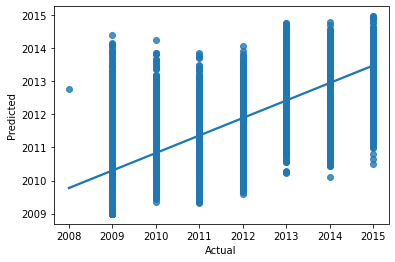

In [20]:
sns.regplot('Actual' , 'Predicted', data = pred_actual);

In [21]:
mape_test = np.mean(np.abs(error_test / pred_tf)*100)

In [22]:
Acc = 100 - mape_test
Acc

99.94796584838136

In [23]:
mape_test

0.0520341516186402